In [1]:
import numpy as np
import pandas as pd

In [2]:
ecgWithRecord = pd.read_csv("ECGCvdata.csv")

In [3]:
ecg = ecgWithRecord.drop('RECORD', axis=1)

In [4]:
ecg.head()

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,...,273.165412,10.756353,29.253827,-0.042542,NaN,NaN,0.027131,16,42.105263,ARR
3,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,...,263.225677,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR


In [5]:
ecg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   hbpermin    1200 non-null   float64
 1   Pseg        1200 non-null   float64
 2   PQseg       1200 non-null   float64
 3   QRSseg      1200 non-null   float64
 4   QRseg       1200 non-null   float64
 5   QTseg       1200 non-null   float64
 6   RSseg       1200 non-null   float64
 7   STseg       1200 non-null   float64
 8   Tseg        1200 non-null   float64
 9   PTseg       1200 non-null   float64
 10  ECGseg      1200 non-null   float64
 11  QRtoQSdur   431 non-null    float64
 12  RStoQSdur   431 non-null    float64
 13  RRmean      1200 non-null   float64
 14  PPmean      1200 non-null   float64
 15  PQdis       1200 non-null   float64
 16  PonQdis     1200 non-null   float64
 17  PRdis       1200 non-null   float64
 18  PonRdis     1200 non-null   float64
 19  PSdis       1200 non-null  

In [6]:
ecg.isnull().sum()

hbpermin        0
Pseg            0
PQseg           0
QRSseg          0
QRseg           0
QTseg           0
RSseg           0
STseg           0
Tseg            0
PTseg           0
ECGseg          0
QRtoQSdur     769
RStoQSdur     769
RRmean          0
PPmean          0
PQdis           0
PonQdis         0
PRdis           0
PonRdis         0
PSdis           0
PonSdis         0
PTdis           0
PonTdis         0
PToffdis        0
QRdis           0
QSdis           0
QTdis           0
QToffdis        0
RSdis           0
RTdis           0
RToffdis        0
STdis           0
SToffdis        0
PonToffdis      0
PonPQang      557
PQRang        768
QRSang        769
RSTang        769
STToffang     426
RRTot           0
NNTot           0
SDRR            0
IBIM            0
IBISD           0
SDSD            0
RMSSD           0
QRSarea         0
QRSperi         0
PQslope         0
QRslope       768
RSslope       769
STslope         0
NN50            0
pNN50           0
ECG_signal      0
dtype: int

In [7]:
ecg.describe()

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,432.000000,431.000000,1200.000000,1200.000000,1200.000000
mean,81.893980,0.060902,0.078099,0.048238,0.024437,0.141541,0.023800,0.093303,0.102714,0.219640,...,42.484060,199.417894,7.675047,23.915846,-0.071647,0.141737,-0.150496,0.041659,6.442500,8.112425
std,19.324351,0.009453,0.019897,0.034649,0.017501,0.029225,0.017175,0.013332,0.022594,0.046359,...,105.722123,112.292014,8.452832,25.070324,0.049705,0.073086,0.077532,0.026456,7.748445,10.325033
min,12.857143,0.021556,0.044526,0.000000,0.000000,0.098761,0.000000,0.052338,0.034936,0.150000,...,0.800624,61.711281,0.000000,0.000000,-0.219938,0.028660,-0.315525,0.008183,0.000000,0.000000
25%,67.563000,0.053943,0.060344,0.015101,0.007804,0.116016,0.007143,0.089423,0.090046,0.177343,...,4.060951,123.147741,0.000000,0.124186,-0.106660,0.082613,-0.240304,0.023853,1.000000,0.613497
50%,79.872000,0.060642,0.075184,0.044692,0.022676,0.137019,0.021965,0.097825,0.099210,0.215223,...,11.265829,183.603851,5.228299,19.904060,-0.058518,0.108418,-0.116241,0.034460,3.000000,3.680982
75%,96.000000,0.066849,0.095190,0.083032,0.041915,0.166314,0.041097,0.101200,0.112408,0.260269,...,44.785825,248.101035,14.355389,46.194325,-0.027685,0.229659,-0.087565,0.049778,10.000000,12.883436
max,160.500000,0.095317,0.145577,0.120160,0.065278,0.211111,0.058333,0.138444,0.198413,0.347324,...,1725.927603,1478.488460,33.131007,86.577082,-0.005427,0.270786,-0.027983,0.164633,37.000000,52.727273


In [8]:
ecg['ECG_signal'].value_counts()

ECG_signal
ARR    300
AFF    300
CHF    300
NSR    300
Name: count, dtype: int64

<Axes: xlabel='ECG_signal'>

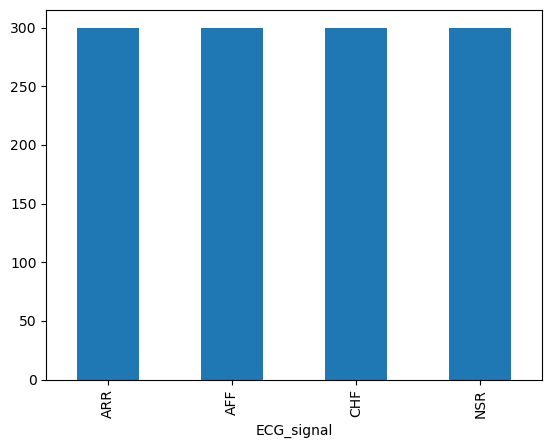

In [9]:
import matplotlib.pyplot as plt
ecg['ECG_signal'].value_counts().plot(kind='bar')

In [10]:
import seaborn as sns
ecg_corr = ecg.select_dtypes(include='number').corr()
ecg_corr

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,SDSD,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50
hbpermin,1.000000,0.067865,-0.029249,-0.031940,-0.029696,-0.077547,-0.034176,-0.086977,-0.000582,-0.061438,...,-0.266609,-0.585930,-0.116224,-0.087578,-0.043637,0.087802,-0.089049,0.002282,0.120748,0.026028
Pseg,0.067865,1.000000,0.405943,0.379102,0.377996,0.340113,0.379635,-0.239713,-0.147503,0.388631,...,-0.009390,0.144346,0.382386,0.387738,0.408750,-0.249114,0.225684,-0.095540,-0.251403,-0.120714
PQseg,-0.029249,0.405943,1.000000,0.848466,0.848962,0.773224,0.846628,-0.510149,-0.326095,0.916623,...,0.017848,0.056625,0.707141,0.728038,0.704993,-0.152879,0.093199,0.069957,0.009899,0.066729
QRSseg,-0.031940,0.379102,0.848466,1.000000,0.999237,0.926764,0.999208,-0.567408,-0.388992,0.948376,...,0.002174,0.046925,0.816598,0.840921,0.687038,-0.181745,0.190232,0.096244,0.012296,0.054696
QRseg,-0.029696,0.377996,0.848962,0.999237,1.000000,0.923243,0.996892,-0.573144,-0.390865,0.946370,...,0.004273,0.047091,0.815860,0.840678,0.684499,-0.193058,0.189721,0.098224,0.012298,0.055513
QTseg,-0.077547,0.340113,0.773224,0.926764,0.923243,1.000000,0.928897,-0.216534,-0.218339,0.962251,...,0.049092,0.146346,0.815719,0.845874,0.672198,-0.372927,0.460235,-0.145953,0.061642,0.137397
RSseg,-0.034176,0.379635,0.846628,0.999208,0.996892,0.928897,1.000000,-0.560673,-0.386474,0.948933,...,0.000031,0.046683,0.816068,0.839849,0.688548,-0.166540,0.187289,0.094076,0.012275,0.053778
STseg,-0.086977,-0.239713,-0.510149,-0.567408,-0.573144,-0.216534,-0.560673,1.000000,0.532352,-0.355451,...,0.101963,0.198843,-0.334175,-0.331288,-0.312067,-0.297086,0.398475,-0.570069,0.103167,0.159030
Tseg,-0.000582,-0.147503,-0.326095,-0.388992,-0.390865,-0.218339,-0.386474,0.532352,1.000000,-0.277595,...,-0.029667,0.050078,-0.225326,-0.232293,-0.190384,-0.373171,0.395190,-0.327051,-0.048440,-0.028155
PTseg,-0.061438,0.388631,0.916623,0.948376,0.946370,0.962251,0.948933,-0.355451,-0.277595,1.000000,...,0.038607,0.116558,0.817720,0.845698,0.726323,-0.355194,0.386343,-0.061983,0.043107,0.115253


In [11]:
mask = np.triu(np.ones_like(ecg_corr, dtype=bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [12]:
plt.figure(figsize=(20,6))

<Figure size 2000x600 with 0 Axes>

<Figure size 2000x600 with 0 Axes>

In [13]:
colormap = 'coolwarm'

In [14]:
#pivot_table = ecg.pivot_table(index=)

<Axes: >

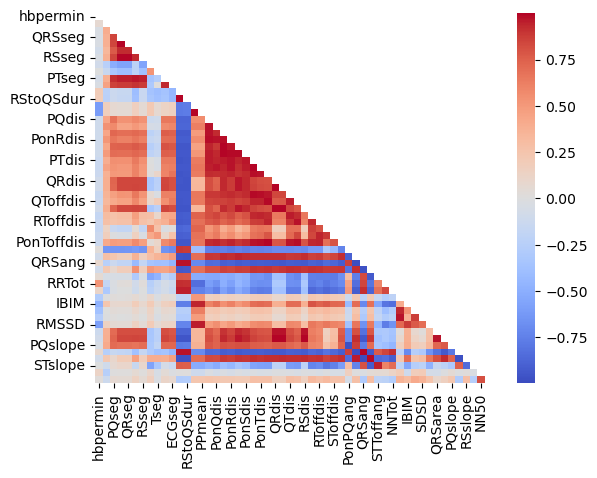

In [15]:
sns.heatmap(ecg_corr, mask=mask, cmap=colormap)

In [16]:
ecgNoSignal = ecg.drop('ECG_signal', axis=1)
ecgNoSignal = ecgNoSignal.fillna(ecgNoSignal.median())

In [17]:
ecgNoSignal['ECG_signal'] = ecg['ECG_signal']
ecgFilled = ecgNoSignal

In [18]:
ecgFilled

,hbpermin,Pseg,PQseg,QRSseg,QRseg,QTseg,RSseg,STseg,Tseg,PTseg,...,RMSSD,QRSarea,QRSperi,PQslope,QRslope,RSslope,STslope,NN50,pNN50,ECG_signal
0,74.925669,0.076508,0.108889,0.088254,0.043571,0.193016,0.044683,0.104762,0.130476,0.301905,...,292.296636,18.457618,63.615239,-0.014364,0.075270,-0.070846,0.012606,2,5.882353,ARR
1,68.503469,0.072483,0.096181,0.093924,0.046267,0.193490,0.047656,0.099566,0.089149,0.289670,...,318.563915,23.043230,67.787773,-0.021207,0.083773,-0.077458,0.016175,1,3.225806,ARR
2,83.488603,0.071154,0.086610,0.039530,0.018590,0.132479,0.020940,0.092949,0.094444,0.219088,...,273.165412,10.756353,29.253827,-0.042542,0.108418,-0.116241,0.027131,16,42.105263,ARR
3,68.503469,0.082812,0.108160,0.090365,0.045226,0.188802,0.045139,0.098437,0.088281,0.296962,...,313.046941,23.845086,65.228737,-0.017806,0.091591,-0.088559,0.017022,2,6.451613,ARR
4,82.080000,0.070760,0.102632,0.101023,0.049415,0.193713,0.051608,0.092690,0.085965,0.296345,...,263.225677,20.942791,72.830353,-0.016650,0.064547,-0.062246,0.016191,2,5.405405,ARR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,91.392000,0.051353,0.062500,0.019150,0.010051,0.118045,0.009099,0.098895,0.086557,0.180545,...,84.181251,0.000000,0.220347,-0.195477,0.108418,-0.116241,0.064196,0,0.000000,NSR
1196,61.440000,0.057355,0.061547,0.061261,0.031345,0.134099,0.029916,0.072837,0.090987,0.195646,...,124.648976,8.243245,22.692888,-0.111698,0.255964,-0.278531,0.112012,0,0.000000,NSR
1197,93.322709,0.058927,0.109137,0.080936,0.040301,0.168112,0.040635,0.087176,0.088081,0.277248,...,82.427729,7.623618,22.380510,-0.045271,0.247145,-0.259303,0.064318,1,0.613497,NSR
1198,63.744000,0.061500,0.101277,0.081793,0.041159,0.145913,0.040635,0.064120,0.081174,0.247189,...,120.230064,8.614011,22.993533,-0.052626,0.263921,-0.280417,0.113422,9,5.521472,NSR


In [19]:
ecgFilled.isnull().sum()

hbpermin      0
Pseg          0
PQseg         0
QRSseg        0
QRseg         0
QTseg         0
RSseg         0
STseg         0
Tseg          0
PTseg         0
ECGseg        0
QRtoQSdur     0
RStoQSdur     0
RRmean        0
PPmean        0
PQdis         0
PonQdis       0
PRdis         0
PonRdis       0
PSdis         0
PonSdis       0
PTdis         0
PonTdis       0
PToffdis      0
QRdis         0
QSdis         0
QTdis         0
QToffdis      0
RSdis         0
RTdis         0
RToffdis      0
STdis         0
SToffdis      0
PonToffdis    0
PonPQang      0
PQRang        0
QRSang        0
RSTang        0
STToffang     0
RRTot         0
NNTot         0
SDRR          0
IBIM          0
IBISD         0
SDSD          0
RMSSD         0
QRSarea       0
QRSperi       0
PQslope       0
QRslope       0
RSslope       0
STslope       0
NN50          0
pNN50         0
ECG_signal    0
dtype: int64

In [20]:
ecgFilled['PonPQang']
# Why still null values? 
## Needed to set filled matrix to a variable! (isn't a destructive method)

0        1.245455
1        2.151593
2        7.583271
3        7.583271
4        1.791385
          ...    
1195    21.328827
1196     8.188221
1197     5.403345
1198     4.611690
1199     4.751589
Name: PonPQang, Length: 1200, dtype: float64

In [21]:
ecg = ecgFilled

In [22]:
# %matplotlib inline

In [23]:
# fGrid = sns.FacetGrid(ecg, col='ECG_signal', height=4)

In [24]:
# fGrid.map(sns.barplot, 'ECG_signal', 'hbpermin')

In [25]:
# fGrid.map(sns.barplot, 'ECG_signal', 'QRSarea')

In [26]:
# plt.show()

In [27]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [28]:
categories = ecg['ECG_signal'].unique()

/Users/manuthakur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manuthakur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manuthakur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manuthakur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

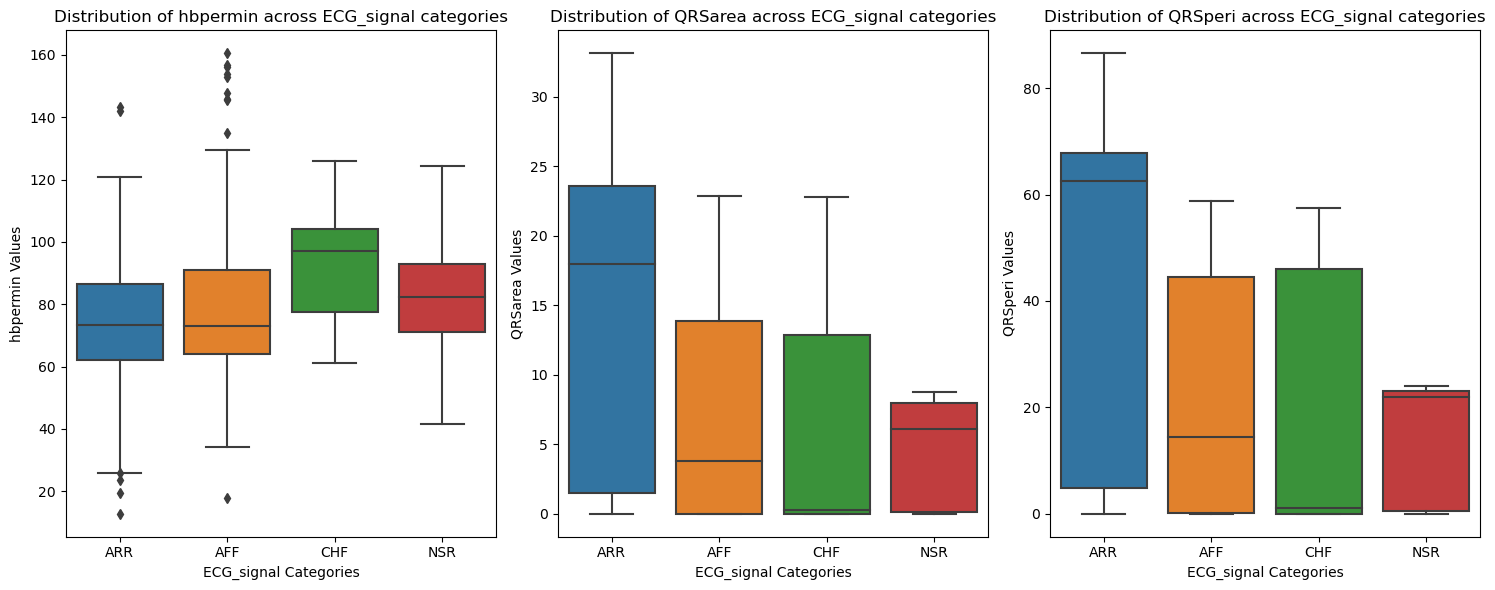

In [29]:
feature_columns = ['hbpermin', 'QRSarea', 'QRSperi']  # Replace with your feature column names

# Create boxplots for each feature across different 'ECG_signal' categories
fig, axes = plt.subplots(1, len(feature_columns), figsize=(15, 2*len(feature_columns)))

# common_y_limit = 180

for i, feature in enumerate(feature_columns):
    sns.boxplot(x='ECG_signal', y=feature, data=ecg, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} across ECG_signal categories')
    axes[i].set_xlabel('ECG_signal Categories')
    axes[i].set_ylabel(f'{feature} Values')
#     axes[i].set_ylim(0, common_y_limit)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

/Users/manuthakur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manuthakur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/manuthakur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='ECG_signal', ylabel='hbpermin'>

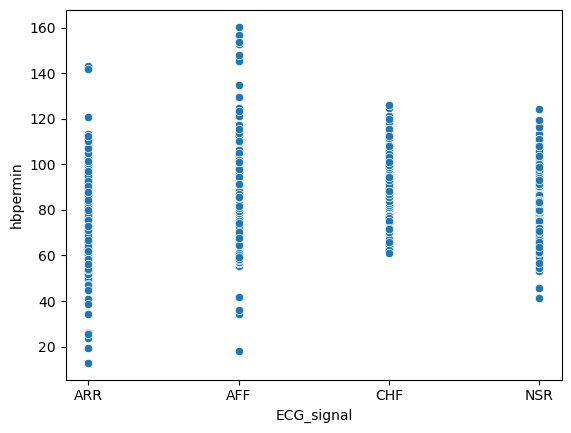

In [30]:
sns.scatterplot(x='ECG_signal', y='hbpermin', data=ecg)

In [31]:
ecg.columns

Index(['hbpermin', 'Pseg', 'PQseg', 'QRSseg', 'QRseg', 'QTseg', 'RSseg',
       'STseg', 'Tseg', 'PTseg', 'ECGseg', 'QRtoQSdur', 'RStoQSdur', 'RRmean',
       'PPmean', 'PQdis', 'PonQdis', 'PRdis', 'PonRdis', 'PSdis', 'PonSdis',
       'PTdis', 'PonTdis', 'PToffdis', 'QRdis', 'QSdis', 'QTdis', 'QToffdis',
       'RSdis', 'RTdis', 'RToffdis', 'STdis', 'SToffdis', 'PonToffdis',
       'PonPQang', 'PQRang', 'QRSang', 'RSTang', 'STToffang', 'RRTot', 'NNTot',
       'SDRR', 'IBIM', 'IBISD', 'SDSD', 'RMSSD', 'QRSarea', 'QRSperi',
       'PQslope', 'QRslope', 'RSslope', 'STslope', 'NN50', 'pNN50',
       'ECG_signal'],
      dtype='object')

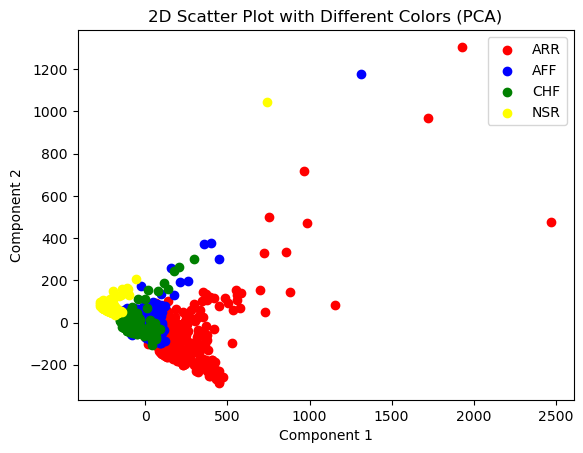

In [32]:
from sklearn.decomposition import PCA

# Assuming 'X' contains your high-dimensional data and 'labels' is the corresponding labels
# Perform PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_2d = pca.fit_transform(ecg.drop('ECG_signal', axis=1))  # X is your high-dimensional data

# Create a DataFrame with the reduced 2D data and labels
data_2d = pd.DataFrame(data=X_2d, columns=['Component 1', 'Component 2'])
data_2d['label'] = ecg['ECG_signal']  # Assuming 'labels' is the label column

# Scatter plot for each label with a different color
for label, color in zip(data_2d['label'].unique(), ['red', 'blue', 'green', 'yellow']):
    plt.scatter(data_2d[data_2d['label'] == label]['Component 1'],
                data_2d[data_2d['label'] == label]['Component 2'],
                label=label, color=color)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('2D Scatter Plot with Different Colors (PCA)')
plt.show()

In [33]:
encoded_target, _ = pd.factorize(ecg['ECG_signal'])

In [34]:
encoded_target

array([0, 0, 0, ..., 3, 3, 3])

In [35]:
ecg['encodedSignals'] = encoded_target

In [36]:
ecg['encodedSignals'].value_counts()

encodedSignals
0    300
1    300
2    300
3    300
Name: count, dtype: int64

In [68]:
# checks correlation between every column and target column
for x in ecg.drop('ECG_signal', axis=1).columns: 
    print(x, ecg[x].corr(ecg['encodedSignals']))

hbpermin 0.22765724910988272
Pseg -0.15632249285032918
PQseg -0.09946159380161461
QRSseg -0.0731778623238411
QRseg -0.07259516805671172
QTseg -0.21166084155019463
RSseg -0.07365676964173322
STseg -0.27378926331087855
Tseg -0.10601739156194306
PTseg -0.17611712313973762
ECGseg -0.2033882765516863
QRtoQSdur 0.5996309610623112
RStoQSdur 0.5980449205464873
RRmean -0.7856668005107762
PPmean -0.7859492556819708
PQdis -0.697235466602354
PonQdis -0.7567877710053923
PRdis -0.6181913430876882
PonRdis -0.6869070461437401
PSdis -0.5720359544271316
PonSdis -0.6351084898351096
PTdis -0.7808886079792905
PonTdis -0.8021191718590748
PToffdis -0.7847555288414261
QRdis -0.4252419914703632
QSdis -0.4305164990488214
QTdis -0.7964262105084915
QToffdis -0.7867791768065089
RSdis -0.42565097723909195
RTdis -0.8887754243688372
RToffdis -0.8309078960786307
STdis -0.8678538007891506
SToffdis -0.8151104371312795
PonToffdis -0.8038408438524038
PonPQang 0.3733127962553226
PQRang -0.5632303107906339
QRSang 0.56720395

In [42]:
tempECG = ecg.drop('ECG_signal', axis=1)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

selected_columns = ['NNTot', 'RRTot', 'RTdis']  # Replace these with the columns you want

# Extract the selected columns and the target column from your DataFrame
X_train = tempECG[selected_columns]  # This will contain your predictor variables
y_train = tempECG['encodedSignals']   # This will be your target variable

# features = list(tempECG.columns)
# label = features.pop(-1)
# x = tempECG[features]
# y = tempECG[label]
# X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.10, random_state=0)

# Assuming X_train contains predictor variables and y_train contains the target variable
# X_train = ...  # Prepare your predictor variables
# y_train = ...  # Prepare your target variable

# Initialize and fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_train)

# Calculate R-squared (multiple correlation coefficient)
r_squared = r2_score(y_train, y_pred)
print("R-squared (Multiple Correlation Coefficient):", r_squared)

R-squared (Multiple Correlation Coefficient): 0.8544218732230735
